# Food Insecurity in Kenya

## Economic Accessibility Analysis

### An analysis made for the Data Kind Event (1st - 4th December 2022)


Datakind event: https://www.datakind.org/dec22datadive

Dataset website: https://data.humdata.org/dataset/wfp-food-prices-for-kenya

Data scientist: **Riccardo Ricci (rikricci@umich.edu)**

References

- https://theconversation.com/kenyas-maize-price-has-doubled-in-a-year-6-ways-to-avoid-a-staple-food-shortage-190149
- https://hxlstandard.org/standard/1-1final/tagging/
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3771133/figure/fig2/

I focus on Economic Accessibility

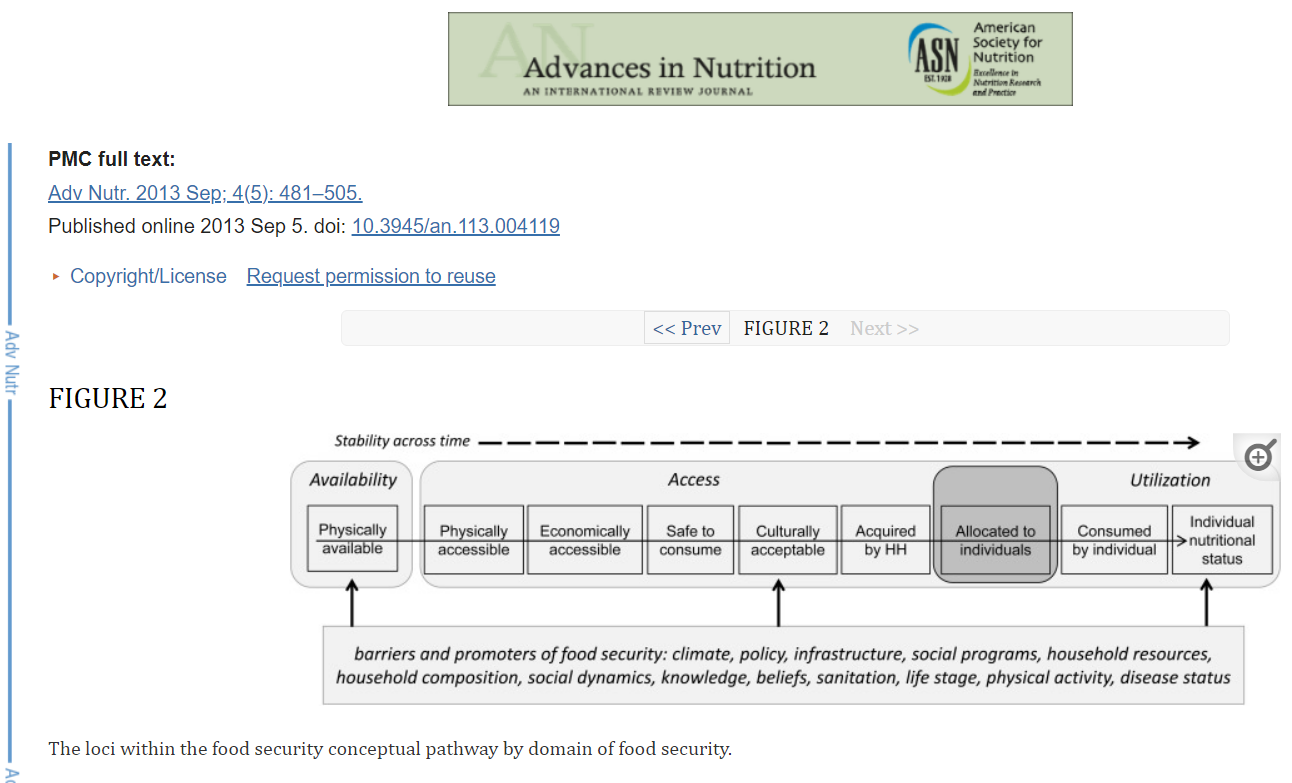

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3771133/figure/fig2/

In [1]:
# Dependencies. Run this cell if you do not have the packages below installed
# %pip install pandas
# %pip install altair

In [2]:
import pandas as pd
import numpy as np
import altair as alt
from altair import datum

pd.options.display.max_rows = 200

In [3]:
food_prices = pd.read_csv('assets\wfp_food_prices_ken.csv') #K4 in DataKind Document https://docs.google.com/document/d/1TQ2TiGK_k8KEIUPzVb3ZSKaxzEBP9s9ZJBI2U_HeQ6U/edit#heading=h.jznwvtays2au
food_prices.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705


The first row is an HXL (Humanitarian Exchange Language) tag, a standard for increasing the efficiency and effectiveness of data exchange during humanitarian crises (see https://hxlstandard.org/standard/1-1final/tagging/).

In [4]:
food_prices = food_prices.drop(index = 0)
food_prices.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355


In [5]:
food_prices['date'] = pd.to_datetime(food_prices['date'])
food_prices['price'] = food_prices['price'].astype('float')
food_prices['usdprice'] = food_prices['usdprice'].astype('float')
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14450 entries, 1 to 14450
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14450 non-null  datetime64[ns]
 1   admin1     14450 non-null  object        
 2   admin2     14450 non-null  object        
 3   market     14450 non-null  object        
 4   latitude   14450 non-null  object        
 5   longitude  14450 non-null  object        
 6   category   14450 non-null  object        
 7   commodity  14450 non-null  object        
 8   unit       14450 non-null  object        
 9   priceflag  14450 non-null  object        
 10  pricetype  14450 non-null  object        
 11  currency   14450 non-null  object        
 12  price      14450 non-null  float64       
 13  usdprice   14450 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 1.5+ MB


In [6]:
food_prices.admin1.unique()

array(['Coast', 'Eastern', 'Nairobi', 'North Eastern', 'Nyanza',
       'Rift Valley', 'Central'], dtype=object)

In [7]:
food_prices.admin2.unique()

array(['Mombasa', 'Kitui', 'Marsabit', 'Nairobi', 'Mandera', 'Kisumu',
       'Turkana', 'Uasin Gishu', 'Nakuru', 'Kilifi', 'Tana River',
       'Garissa', 'Baringo', 'Kajiado', 'Nyeri', 'Kwale', 'Makueni',
       'West Pokot', 'Machakos', 'Meru South', 'Isiolo', 'Wajir'],
      dtype=object)

In [8]:
food_prices.market.unique()

array(['Mombasa', 'Kitui', 'Marsabit', 'Nairobi', 'Mandera', 'Kisumu',
       'Lodwar (Turkana)', 'Eldoret town (Uasin Gishu)', 'Nakuru',
       'Kilifi', 'Hola (Tana River)', 'Garissa', 'Marigat (Baringo)',
       'Kajiado', 'Karatina (Nyeri)', 'Vanga (Kwale)',
       'Kitui town (Kitui)', 'Makueni', 'Wote town (Makueni)',
       'Kitengela (Kajiado)', 'Garissa town (Garissa)',
       'Takaba (Mandera)', 'Marigat town (Baringo)',
       'Illbissil Food Market (Kajiado)', 'Wakulima (Nakuru)',
       'Lomut (West Pokot)', 'Kongowea (Mombasa)',
       'Tala Centre Market (Machakos)', 'Kangemi (Nairobi)',
       'Kibuye (Kisumu)', 'Makutano (West Pokot)',
       'Kathonzweni (Makueni)', 'Kaanwa (Tharaka Nithi)',
       'Wakulima (Nairobi)', 'Bangladesh (Mombasa)', 'Kalahari (Mombasa)',
       'Shonda (Mombasa)', 'Kawangware (Nairobi)', 'Kibra (Nairobi)',
       'Mathare (Nairobi)', 'Mukuru (Nairobi)', 'Dagahaley (Daadab)',
       'Hagadera (Daadab)', 'Kalobeyei (Village 1)',
       'Kalob

What commodities are in this dataset?

In [9]:
food_prices['commodity'].unique()

array(['Maize', 'Maize (white)', 'Beans', 'Beans (dry)',
       'Potatoes (Irish)', 'Sorghum', 'Bread', 'Milk (cow, pasteurized)',
       'Oil (vegetable)', 'Fuel (diesel)', 'Fuel (kerosene)',
       'Fuel (petrol-gasoline)', 'Maize flour', 'Rice', 'Wheat flour',
       'Meat (beef)', 'Meat (goat)', 'Milk (UHT)', 'Sugar', 'Cooking fat',
       'Bananas', 'Kale', 'Onions (red)', 'Tomatoes',
       'Potatoes (Irish, red)', 'Beans (kidney)', 'Beans (rosecoco)',
       'Beans (yellow)', 'Cabbage', 'Onions (dry)', 'Spinach',
       'Potatoes (Irish, white)', 'Rice (aromatic)', 'Sorghum (red)',
       'Beans (dolichos)', 'Cowpeas', 'Cowpea leaves',
       'Maize (white, dry)', 'Beans (mung)', 'Millet (finger)',
       'Rice (imported, Pakistan)', 'Fish (omena, dry)',
       'Sorghum (white)', 'Salt', 'Meat (camel)', 'Milk (camel, fresh)',
       'Milk (cow, fresh)'], dtype=object)

## 1. What is the price trend by commodity?

In [10]:
food_prices.priceflag.value_counts()

actual       9979
aggregate    4185
forecast      286
Name: priceflag, dtype: int64

In [11]:
food_prices['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

In [12]:
food_prices['unit'].unique() 

# the unit is different between Wholesale and Retail for a given commoddity making them not comparable
#See an example below for Beans (dry)

array(['KG', '90 KG', '50 KG', '400 G', '500 ML', 'L', '200 ML', 'Unit',
       'Bunch', '126 KG', '13 KG', '64 KG', '200 G', 'Head'], dtype=object)

In [13]:
food_prices[(food_prices.commodity == 'Beans (dry)')].head(2)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
8,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39.0,0.5403


Let's focus on a subset of commodity for which we have enough data points over time

In [14]:
commodities = ['Beans', 'Beans (dry)', 'Bread', 'Fuel (diesel)', 'Fuel (kerosene)', 'Fuel (petrol-gasoline)', 
'Maize', 'Maize (white)', 'Milk (cow, pasteurized)', 'Oil (vegetable)', 'Potatoes (Irish)', 'Sorghum']

In [15]:
food_prices_sbs = food_prices[food_prices['commodity'].isin(commodities)]
food_prices_sbs.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355


In [16]:
def get_commodity_price_chart(df, commodity, priceflg, pricetype):
    """Create a Altair chart showing the USD price trend for a given commodity e.g. beans. To smooth the curve
    and see a trend better the price is calcualted over a rolling average of six data points (six months)
    
    Args:
        df: the dataframe with food prices
        commodity: e.g. beans, bananas, rice
        priceflag: a list of price flages i.e. actual, forecast, aggregate
    
    Returns:
        An Altair chart with the USD price trend for a commodity and one or more price flags
    """

    df_com = df[(df['commodity'] == commodity) & (df['priceflag'].isin(priceflg)) & (df['pricetype'] == pricetype)]
    try:
        unit = df_com.unit.iloc[0]
    except:
        unit = ''
    df_com = df_com.groupby(['date','priceflag','pricetype']).mean()
    df_com = df_com['usdprice'].rolling(4).mean() #rolling average to smooth the curve
    df_com = df_com.reset_index()

    chart = alt.Chart(data = df_com).mark_line().encode(
        x = alt.X('date:T', title = '', scale=alt.Scale(domain=[min(df.date), max(df.date)])),
        y = alt.Y('usdprice:Q', title =  'USD Price ($)' + ' per ' + unit)
    ).properties(

        title={
          "text": commodity, 
          "fontSize":12,
          "subtitle": pricetype + ' price',
          "subtitleColor": "gray"
    },
        width=150, 
        height=150)

    return chart

In [17]:
get_commodity_price_chart(food_prices_sbs, 'Beans (dry)', ['actual'], 'Wholesale')

alt.Chart(...)

In [18]:
get_commodity_price_chart(food_prices_sbs, 'Beans (dry)', ['actual'], 'Retail')

alt.Chart(...)

In [19]:
def create_charts(df, priceflag, pricetype):
    """create a list of charts"""
    charts = {} 
    for commo in list(df['commodity'].unique()):
        charts[commo] = get_commodity_price_chart(df, commo, priceflag, pricetype)
    charts = dict(sorted(charts.items()))
    list_of_charts = list(charts.values())
    return list_of_charts

In [20]:
def facet_wrap(subplts, plots_per_row):
    """combine charts into a matrix of small multiple charts 
    Stack Overflow https://stackoverflow.com/questions/50164001/multiple-column-row-facet-wrap-in-altair
    
    Args
        subplts: list of charts
        plots_per_row: how many plots per rows
    
    Return
        compound_chart: charts concatenated into a matrix of subplots
    """
    rows = [subplts[i:i+plots_per_row] for i in range(0, len(subplts), plots_per_row)]
    compound_chart = alt.hconcat()
    for r in rows:
        rowplot = alt.vconcat() #start a new row
        for item in r:
            rowplot |= item #add suplot to current row as a new column
        compound_chart &= rowplot # add the entire row of plots as a new row
    return compound_chart

In [21]:
charts = create_charts(food_prices_sbs, ['actual'], 'Wholesale')
compound_chart = facet_wrap(charts, plots_per_row=4) 
compound_chart.properties(
    title = {'text': 'Actual Wholesale Price Trend per Commodity in Kenya (four months rolling average)',
            'fontSize': 14})

alt.VConcatChart(...)

In [22]:
charts = create_charts(food_prices_sbs, ['actual'], 'Retail')
compound_chart = facet_wrap(charts, plots_per_row=4) 
compound_chart.properties(
    title = {'text': 'Actual Retail Price Trend per Commodity in Kenya (four months rolling average)',
            'fontSize': 14})

alt.VConcatChart(...)

The actual price of **Beans (dry)**, **Sorghum** and **Potatoes** are increasing in both wholesale and retail. The price of of other commodities are steady (e.g. bread, milk) ord decreasing

The price of **maize** has several fluctuations.

## What are the markets with higher prices for a commodity?

In [23]:
#for name, group in maize.last('12M').groupby(['admin1','admin2','market']):
#    print(name)
#    print(group.tail(1))

In [24]:
def get_bar_chart(df, commodity, priceflag, pricetype):
    
    df = df[(df['commodity'] == commodity) 
             & (df['priceflag'] == priceflag) 
             & (df['pricetype'] == pricetype)]
    df = df.set_index('date')
    df_last = df.last('3Y').groupby(['admin1','admin2','market']).tail(1)
    df_last = df_last.reset_index()
    
    try:
        unit = df.unit.iloc[0]
        usd_price_max_ext = max(df_last.usdprice) * 1.2  # enlarging the scale to fit the chart
    except:
        unit = ''
        return -1 # no chart becasue no price is available
    
    bar = alt.Chart(data = df_last).mark_bar().encode(
        alt.Y('market:N', sort = '-x', title = ''),
        alt.X('usdprice:Q', 
              scale=alt.Scale(domain=[0, usd_price_max_ext]),
              title =  'USD Price ($)' + ' per ' + unit)
    ) 

    text1 = bar.mark_text(text = 'at', dx = 5).encode()

    text2 = bar.mark_text(dx = 35).encode(
        alt.Text('date:T', timeUnit = 'yearmonth')
    )

    chart = (bar + text1 + text2).properties(
        title={
          "text": commodity, 
          "fontSize":12,
          "subtitle": pricetype + ' price',
          "subtitleColor": "gray"
    },
        width=300, 
        height=150)  
    return chart

In [25]:
def create_bar_charts(df, priceflag, pricetype):
    """create a list of charts"""
    charts = {} 
    for commo in list(df['commodity'].unique()):
        charts[commo] = get_bar_chart(df, commo, priceflag, pricetype)
    charts = dict(sorted(charts.items()))
    list_of_charts = list(charts.values())
    return list_of_charts

In [26]:
charts = create_bar_charts(food_prices_sbs, 'actual', 'Wholesale')
charts = [chart for chart in charts if chart != -1] # removing the 
compound_chart = facet_wrap(charts, plots_per_row=2) 
compound_chart.properties(
    title = {'text': 'Actual Wholesale Price by Market and Commodity in Kenya',
            'fontSize': 14})

alt.VConcatChart(...)

In [27]:
charts = create_bar_charts(food_prices_sbs, 'actual', 'Retail')
charts = [chart for chart in charts if chart != -1] # removing the 
compound_chart = facet_wrap(charts, plots_per_row=2) 
compound_chart.properties(
    title = {'text': 'Actual Retail Price by Market and Commodity in Kenya',
            'fontSize': 14})

alt.VConcatChart(...)